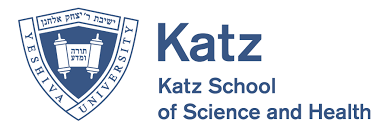

# Jesus Olivera
## Yeshiva University, DAV
## Independent Study: Data Labeling Tool 

Consider these tips for working with this notebook:
- Notebook code serves as a logical foundation for the development of this project.
- This pipeline is optimized for the original framework and it will have to be updated to reflect the actual enviroment in which it will be deployed.
- Before modifying the pipeline or trying to re-fit the pipeline, consider evaluating system integration and tools setup.

## Notebook Content

This notebook contains a logical framework for braking ties by applying a machine learning model to perform a binary voting forecast.   

Familiarity with data engineering (DE) and data science (DS) is required.

## Notebook Goals 

- Pipeline Definition
- Pipeline Integration
- Pipeline Evaluation

## Step 1: Importing libraries

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
# Importing Random Forest Model
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Method 1 

In [52]:
# Importing dummy data from Local Host - dummy data can aslo be retrieved from Github project under "data"

## ***Actual data to be retrieved from S3 after properly parsing has been performed***

df = pd.read_csv(r"C:\Users\PC\Desktop\dummy output.csv")

df.head()

,id,created_username,label,created_ago,task,data,meta,created_at,updated_at,is labeled,overlap,project,file_upload,completed_by,result,was_cancelled,ground_true,parent_prediction
0,1,user 1,0,0.849339,1,url1,NaN,2:59:34,9:08:17,False,1,1,NaN,1,NaN,True,False,NaN
1,2,user 2,-1,3.699334,2,url2,NaN,15:57:26,5:32:13,False,1,1,NaN,2,NaN,True,False,NaN
2,3,user 3,-1,4.648402,1,url3,NaN,21:33:25,19:54:42,False,1,1,NaN,3,NaN,True,False,NaN
3,4,user 4,1,10.202498,3,url4,NaN,21:09:43,5:09:38,False,1,1,NaN,4,NaN,True,False,NaN
4,5,user 5,0,10.281144,1,url5,NaN,5:51:40,1:54:56,False,1,1,NaN,5,NaN,True,False,NaN


In [53]:
# Removing elements with neutral label (-1) from dataset
dummy_output = df[df.label != -1]

In [54]:
# Understanding the outputs

grouped = dummy_output.groupby(['task','label'])["id"].count().reset_index(name="count")

grouped

,task,label,count
0,1,0,9
1,1,1,14
2,2,0,13
3,2,1,13
4,3,0,7
5,3,1,11


In [55]:
# Evaluating outputs and determining if ties exists

ties = grouped[grouped.duplicated(['task','count'])]
ties

,task,label,count
3,2,1,13


In [56]:
# Dataframe to list to automate prediction flow

ties_tolist = ties.values.tolist()

ties_tolist

[[2, 1, 13]]

In [57]:
# User defined function to retireve first element of list (task)

def Extract(lst):
    return [item[0] for item in lst]

In [58]:
# Calling function to retrive first element of list(s)

label_to_predict = Extract(ties_tolist)

label_to_predict

[2]

## ML Model Setup

In [59]:
# Random Forest ML Model Setup

X = dummy_output[['task']]

y = dummy_output[['label']]


In [60]:
# Split dataset into training set and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [61]:
#Create a Gaussian Classifier
clf=RandomForestClassifier()

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train.values.ravel())

y_pred=clf.predict(X_test)

In [62]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6190476190476191


## Making a Prediction

In [63]:
# User defined function to evaluate if more than one tie requires a 
# new prediction or if only one value needs to be predicted

def predict_next_value(x):
    if any(isinstance(el, list) for el in x) == False:
        return clf.predict([x])
    else: 
        return clf.predict(x)
    

In [64]:
# Passing the list so the function can predict the next label
predict_next_value(label_to_predict)

array([0], dtype=int64)